In [2]:
import pandas as pd
import json
import os
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import wasserstein_distance
# sns.set(style='ticks', context='paper', font='CMU Sans Serif')
sns.set(style='ticks', context='paper')
from collections import defaultdict
import numpy as np
from util import plot_cdf

['ns3: 16448,116134.5,204264', 'pmn-m: 36,167.5,378', 'mlsys: 53,86.0,162']
mlsys: 192,192


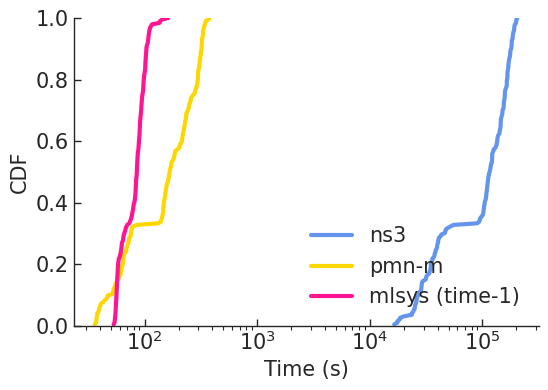

In [4]:
time_elapsed=defaultdict(lambda:[])
time_elapsed_2=[]
method_list=['ns3','pmn-m','mlsys']
for mix_id in range(192):
    for method in method_list:
        if os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/mlsys/elapsed.txt'):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/elapsed.txt') as file:
                for line in file:
                    if method!='mlsys':
                        tmp=line.rstrip()
                        time_elapsed[method].append(int(tmp))
                    else:
                        tmp=line.rstrip().split(',')
                        time_elapsed[method].append(int(tmp[0])-int(tmp[2]))
                        time_elapsed_2.append(int(tmp[1]))
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
# legend_list=["{}:{:.0f}s, {:.0f}s, {:.0f}s".format(key,np.min(time_elapsed[key]),np.median(time_elapsed[key]),np.max(time_elapsed[key])) for key in time_elapsed]
legend_list=['ns3','pmn-m','mlsys (time-1)']
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'test.pdf',legend_list,'Time (s)',legend_font=15,group_size=len(method_list),log_switch=True,loc=4)

print(f"mlsys: {len(time_elapsed['mlsys'])},{len(time_elapsed_2)}")

[24517, 24517, 24517, 24303, 24303, 24272, 24272, 24257, 24257, 24257, 24257, 24243, 24243, 24229, 24229, 24229, 24229, 24225, 24225, 24225, 24204, 24204, 24204, 24204, 24189, 24167, 24167, 24167, 24167, 24163, 24163, 24163, 24163, 24143, 24143, 24143, 24143, 24143, 24127, 24127, 24127, 24127, 24114, 24114, 24114, 24114, 24114, 24105, 24105, 24105, 24105, 24097, 24097, 24092, 24092, 24092, 24092, 24092, 24084, 24084, 24084, 24084, 24084, 24084, 24084, 24084, 24083, 24083, 24080, 24080, 24080, 24080, 24077, 24077, 24068, 24068, 24057, 24057, 24057, 24057, 24057, 24057, 24057, 24057, 24057, 24057, 24041, 24041, 24041, 24038, 24038, 24038, 24038, 24038, 24038, 24028, 24028, 24022, 24022, 24022, 24022, 23997, 23997, 23997, 23997, 23997, 23972, 23972, 23972, 23968, 23968, 23966, 23966, 23966, 23966, 23966, 23966, 23963, 23958, 23958, 23958, 23949, 23949, 23949, 23949, 23949, 23947, 23945, 23945, 23942, 23942, 23907, 23907, 23907, 23894, 23894, 23894, 23894, 23894, 23893, 23887, 23887, 23887

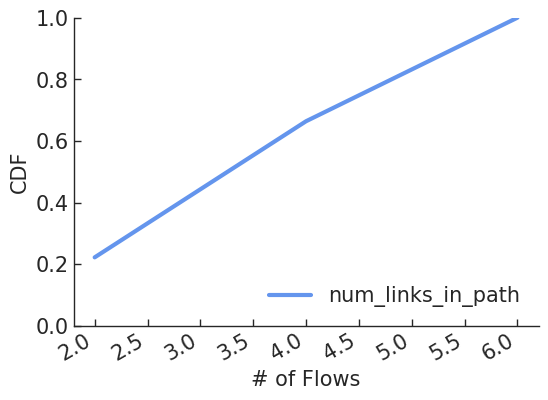

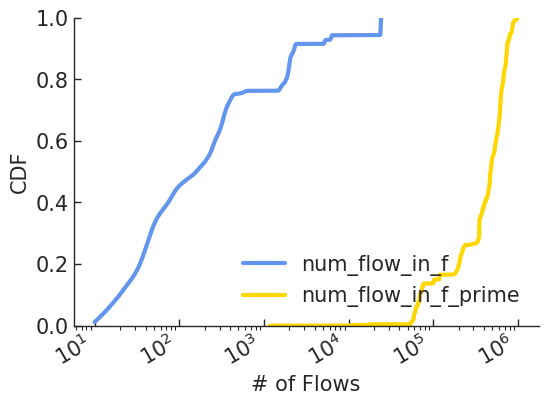

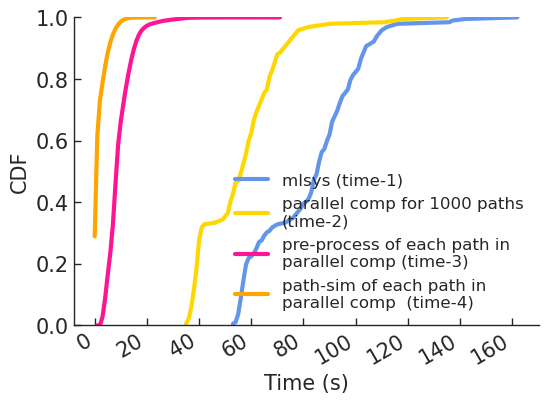

In [6]:
num_flow_in_f=[]
num_flow_in_f_prime=[]
num_link_in_path=[]
time_preprop=[]
time_path_sim=[]
method_list=['mlsys']
for mix_id in range(192):
    for method in method_list:
        for path_id in range(1000):
            if os.path.exists(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/mlsys/elapsed.txt'):
                with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path_{path_id}.txt') as file:
                    for line_id,line in enumerate(file):
                        if line_id==0:
                            tmp=line.rstrip().split(',')
                            num_flow_in_f.append(int(tmp[-2]))
                            num_flow_in_f_prime.append(int(tmp[-1]))
                            num_link_in_path.append(len(tmp)-3)
                        elif line_id==1:
                            tmp=line.rstrip().split(',')
                            time_preprop.append(int(tmp[0]))
                            time_path_sim.append(int(tmp[1]))

res=np.array([num_link_in_path])
plot_cdf(res,'num_link.pdf',['num_links_in_path'],'# of Flows',legend_font=15,group_size=1,loc=4,rotate_xaxis=True)
print(num_flow_in_f)
res=np.array([num_flow_in_f,num_flow_in_f_prime])
plot_cdf(res,'num_flow.pdf',['num_flow_in_f','num_flow_in_f_prime'],'# of Flows',legend_font=15,group_size=2,loc=4,rotate_xaxis=True,log_switch=True)

res=[np.array(x) for x in [time_elapsed['mlsys'],time_elapsed_2, time_preprop,time_path_sim]]
plot_cdf(res,'time_internal.pdf',['mlsys (time-1)','parallel comp for 1000 paths (time-2)','pre-process of each path in parallel comp (time-3)','path-sim of each path in parallel comp  (time-4)'],'Time (s)',legend_font=12,group_size=4,loc=4,rotate_xaxis=True)

['mlsys: 167323,323123.0,991516']


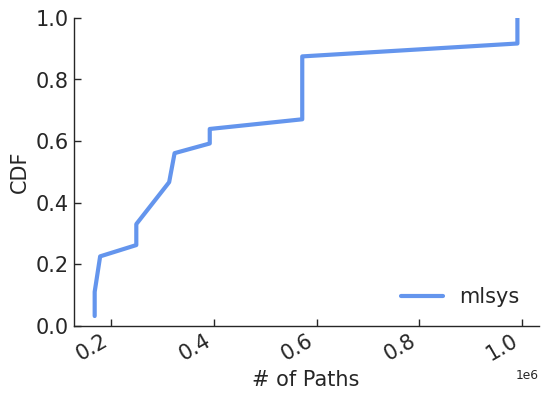

In [8]:
time_elapsed=defaultdict(lambda:[])
method_list=['mlsys']
for mix_id in range(191):
    for method in method_list:
        with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/path.txt') as file:
            number_of_lines = len(file.readlines())
            time_elapsed[method].append(number_of_lines-3)
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res=np.array(list(time_elapsed.values()))
plot_cdf(res,'num_path.pdf',method_list,'# of Paths',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

In [27]:
time_elapsed=defaultdict(lambda:[])
num_flows=defaultdict(lambda:[])
method_list=['flowsim-all']
for mix_id in range(191):
    for method in method_list:
        for path_idx in range(20):
            with open(f'/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/{mix_id}/{method}/{path_idx}/output.txt') as file:
                line_idx=0
                for line in file:
                    if line_idx==0:
                        tmp=line.rstrip().split(':')[-1]
                        num_flows[method].append(int(tmp))
                    elif line_idx==1:
                        tmp=line.rstrip().split(':')[-1]
                        time_elapsed[method].append(float(tmp))
                    line_idx+=1
print([f"{key}: {np.min(time_elapsed[key])},{np.median(time_elapsed[key])},{np.max(time_elapsed[key])}" for key in time_elapsed])
res_time=np.array(list(time_elapsed.values()))
res_flow=np.array(list(num_flows.values()))
plot_cdf(res_flow,'num_flows.pdf',method_list,'# of flows in each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)
plot_cdf(res_time,'time_elapsed.pdf',method_list,'Time (s) for each path-level sim',legend_font=15,group_size=len(method_list),loc=4,rotate_xaxis=True)

FileNotFoundError: [Errno 2] No such file or directory: '/data1/lichenni/projects/flow_simulation/parsimon-eval/expts/fig_8/data/0/flowsim-all/0/output.txt'